In [ ]:
# 영화 과람객 예측

# 목적: test 데이터의 box_off_num을 예측한다. 

In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn import datasets
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [30]:
train = pd.read_csv('../input/movies_train.csv')
test = pd.read_csv('../input/movies_test.csv')

In [31]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [32]:
test.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.0,1,4,4
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.0,1,68,7
242,조선안방 스캔들-칠거지악 2,(주) 케이알씨지,멜로/로맨스,2015-10-22,76,청소년 관람불가,이전,NaN,0,10,4


In [9]:
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [ ]:
x = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']

In [33]:
# TODO 각 필드의 의미; 
# TOdo 필드에서 취할 것 정하기
x = train[['genre', 'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num', 'num_actor']]
y = train['box_off_num']

In [34]:
# 테스트 데이터 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [35]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

420
180
420
180


In [36]:
x_train['genre'].unique()

array(['멜로/로맨스', '액션', '다큐멘터리', '드라마', '코미디', '공포', '서스펜스', '느와르', '미스터리',
       '애니메이션', 'SF', '뮤지컬'], dtype=object)

In [49]:
x_train.head(13)


,genre,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_actor
270,멜로/로맨스,청소년 관람불가,권칠인,NaN,0,4
188,액션,청소년 관람불가,박상현,NaN,0,2
394,다큐멘터리,전체 관람가,손석,16844.0,1,1
449,드라마,15세 관람가,김효정,NaN,0,2
544,멜로/로맨스,15세 관람가,김동원,340.0,1,3
278,드라마,15세 관람가,김성수,72.5,2,3
573,드라마,15세 관람가,김태곤,NaN,0,4
581,코미디,청소년 관람불가,김선,7763.0,1,4
572,드라마,15세 관람가,신성섭,NaN,0,3
215,멜로/로맨스,청소년 관람불가,노진수,NaN,0,3


In [ ]:
x_train.genre.astype('category').cat.codes # x_train 5: 멜로/로멘스 10: 액션 3: 다큐멘터리 4: 드라마 11: 코메디 1: 공포

In [45]:
x_test.head()

,genre,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_actor
346,드라마,15세 관람가,임순례,20380.0,1,3
404,드라마,15세 관람가,최영석,NaN,0,3
221,코미디,12세 관람가,오멸,NaN,0,5
440,멜로/로맨스,청소년 관람불가,이전,NaN,0,4
234,공포,청소년 관람불가,황철민,NaN,0,3


In [54]:
test.genre.astype('category').cat.codes.head()

0     2
1     5
2     4
3    10
4     1
dtype: int8

In [52]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
x_test.genre.astype('category').cat.codes # x_train 5: 멜로/로멘스 10: 액션 3: 다큐멘터리 4: 드라마 11: 코메디 1: 공포
                                          # x_test   4: 드라마 11: 코미디 5: 멜로/로맨스 1: 공포

In [57]:
#x_train.loc[:,'genre'] = pd.Categorical(x_train.loc[:,'genre'])
#df['code'] = df.cc.cat.codes
x_train.genre = pd.Categorical(x_train.genre)
x_train['genre_cd'] = x_train.genre.cat.codes

x_train.screening_rat = pd.Categorical(x_train.screening_rat)
x_train['screening_rat_cd'] = x_train.screening_rat.cat.codes

x_train.director = pd.Categorical(x_train.director)
x_train['director_cd'] = x_train.director.cat.codes



/home/hygjob/testbed/datascience/ve/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/hygjob/testbed/datascience/ve/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/hygjob/testbed/datascience/ve/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [59]:
x_test.genre = pd.Categorical(x_test.genre)
x_test['genre_cd'] = x_test.genre.cat.codes

x_test.screening_rat = pd.Categorical(x_test.screening_rat)
x_test['screening_rat_cd'] = x_test.screening_rat.cat.codes

x_test.director = pd.Categorical(x_test.director)
x_test['director_cd'] = x_test.director.cat.codes

/home/hygjob/testbed/datascience/ve/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/hygjob/testbed/datascience/ve/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/hygjob/testbed/datascience/ve/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [61]:
x_test.columns

Index(['genre', 'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_actor', 'genre_cd', 'screening_rat_cd', 'director_cd'],
      dtype='object')

In [64]:
x_train_p

,genre_cd,screening_rat_cd,director_cd,dir_prev_bfnum,dir_prev_num,num_actor
270,5,3,18,NaN,0,4
188,10,3,113,NaN,0,2
394,3,2,153,1.684400e+04,1,1
449,4,1,85,NaN,0,2
544,5,1,32,3.400000e+02,1,3
278,4,1,48,7.250000e+01,2,3
573,4,1,75,NaN,0,4
581,11,3,45,7.763000e+03,1,4
572,4,1,162,NaN,0,3
215,5,3,92,NaN,0,3


In [ ]:
x_train_p.fillna(0)
x_test_p.fillna(0)

In [70]:
x_train_p

,genre_cd,screening_rat_cd,director_cd,dir_prev_bfnum,dir_prev_num,num_actor
270,5,3,18,NaN,0,4
188,10,3,113,NaN,0,2
394,3,2,153,1.684400e+04,1,1
449,4,1,85,NaN,0,2
544,5,1,32,3.400000e+02,1,3
278,4,1,48,7.250000e+01,2,3
573,4,1,75,NaN,0,4
581,11,3,45,7.763000e+03,1,4
572,4,1,162,NaN,0,3
215,5,3,92,NaN,0,3


In [80]:
x_train_p = x_train[[ 'genre_cd', 'screening_rat_cd', 'director_cd', 'dir_prev_num','num_actor']]
x_test_p = x_test[[ 'genre_cd', 'screening_rat_cd', 'director_cd',  'dir_prev_num','num_actor']]


In [81]:
x_train_p

,genre_cd,screening_rat_cd,director_cd,dir_prev_num,num_actor
270,5,3,18,0,4
188,10,3,113,0,2
394,3,2,153,1,1
449,4,1,85,0,2
544,5,1,32,1,3
278,4,1,48,2,3
573,4,1,75,0,4
581,11,3,45,1,4
572,4,1,162,0,3
215,5,3,92,0,3


In [116]:
# 학습 진행
forest = RandomForestRegressor(n_estimators=100)
forest.fit(x_train_p, y_train)

# 예측
y_pred = forest.predict(x_test_p)

# 정확도 확인
#print('정확도 :', metrics.accuracy_score(y_test, y_pred))

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

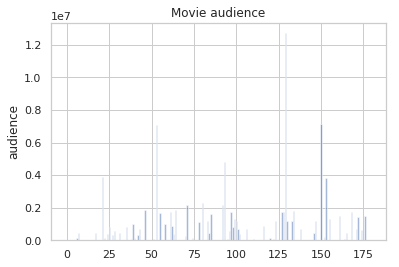

In [117]:
y_pos = np.arange(len(y_test))
audience = y_test.values

plt.bar(y_pos, audience, align='center', alpha=0.5)
#plt.xticks(y_pos, audience)
plt.ylabel('audience')
plt.title('Movie audience')

plt.show()

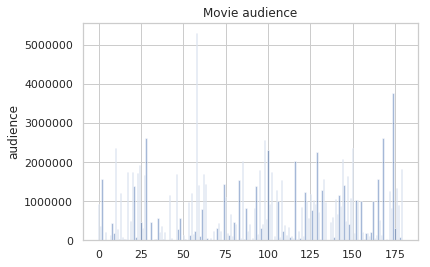

In [118]:
y_pos = np.arange(len(y_pred))
audience = y_pred

plt.bar(y_pos, audience, align='center', alpha=0.5)
#plt.xticks(y_pos, audience)
plt.ylabel('audience')
plt.title('Movie audience')

plt.show()

In [131]:
#y_test_pd
y_test.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

/home/hygjob/testbed/datascience/ve/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


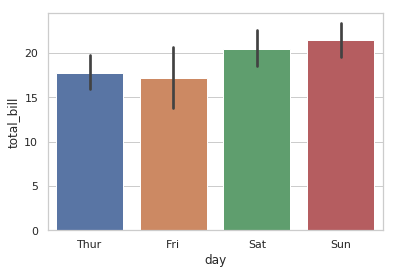

In [100]:
>>> import seaborn as sns
>>> sns.set(style="whitegrid")
>>> tips = sns.load_dataset("tips")
>>> ax = sns.barplot(x="day", y="total_bill", data=tips)

In [101]:
type(tips)

pandas.core.frame.DataFrame

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
 random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

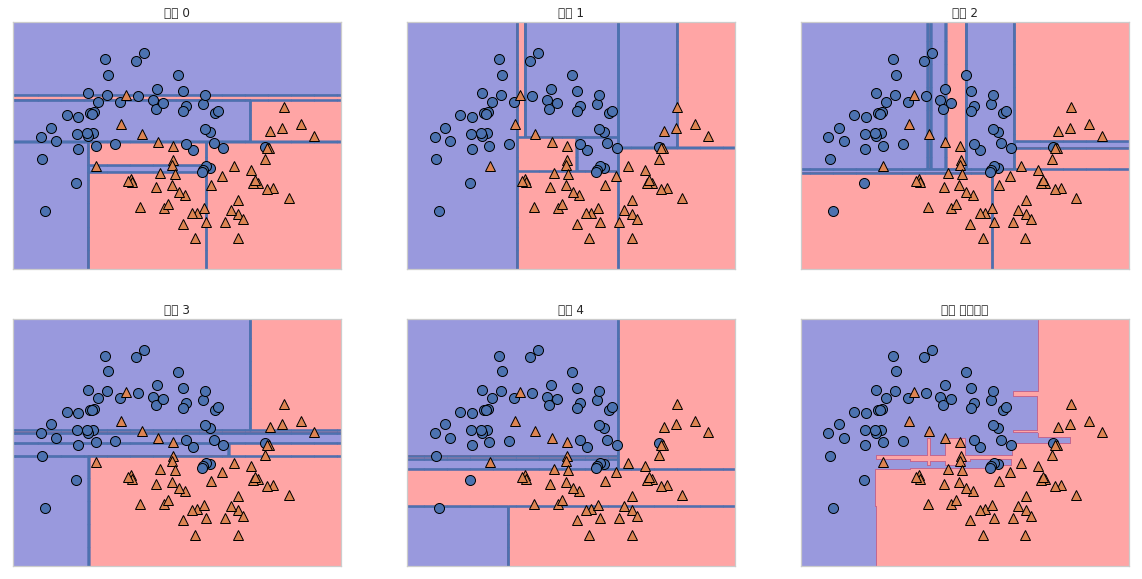

In [123]:
import mglearn

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [122]:
!pip install mglearn

    100% |████████████████████████████████| 542kB 1.1MB/s ta 0:00:011
  Running setup.py bdist_wheel for mglearn ... done
  Stored in directory: /home/hygjob/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn
You are using pip version 9.0.1, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [126]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [127]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [129]:
def plot_feature_importances_cancer(model):

    n_features = cancer.data.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features), cancer.feature_names)

    plt.xlabel("attr importances")

    plt.ylabel("attr")

    plt.ylim(-1, n_features)

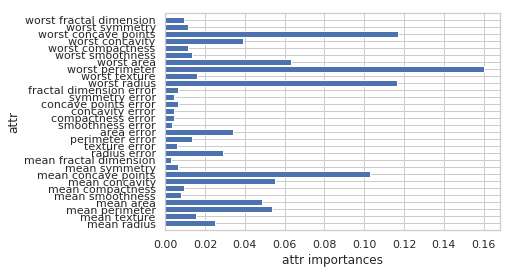

In [130]:
plot_feature_importances_cancer(forest)